Libraries imported successfully.
Dataset loaded successfully.
  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
5   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0  ...         0   
6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0  ...         0   
7   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0  ...         0   
8   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0  ...         0   
9   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  month

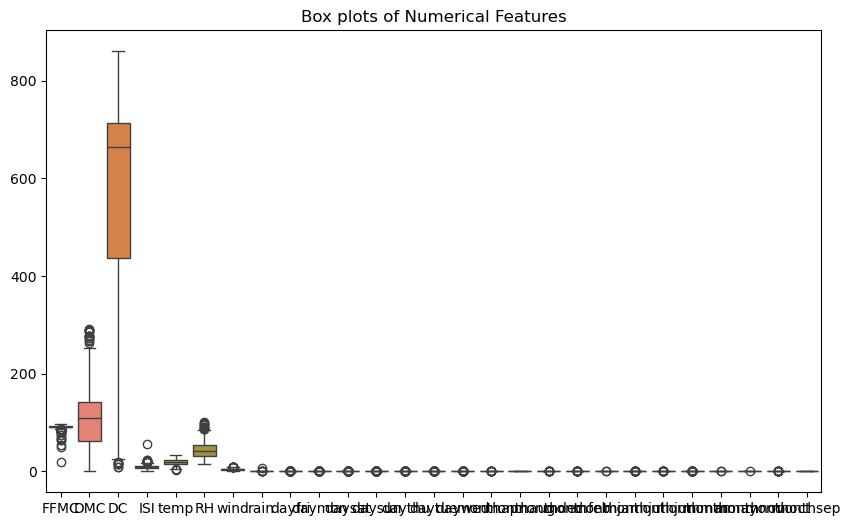

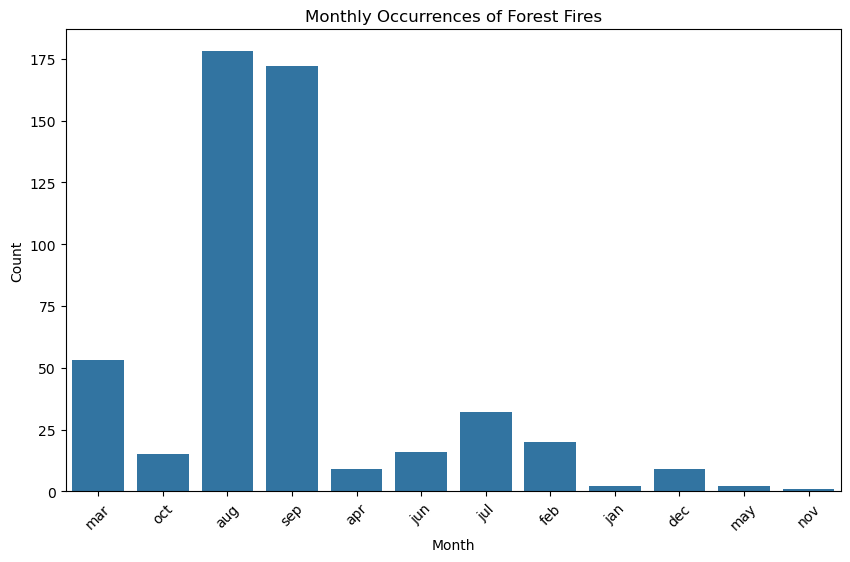

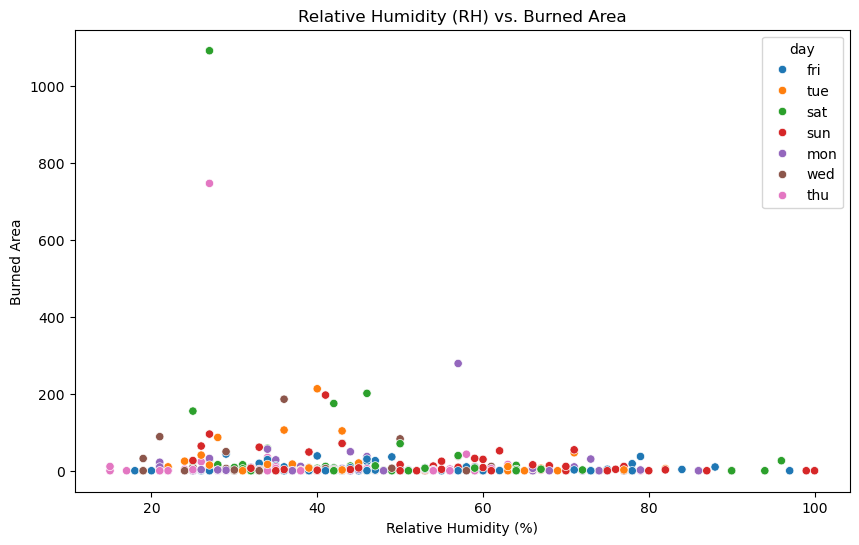

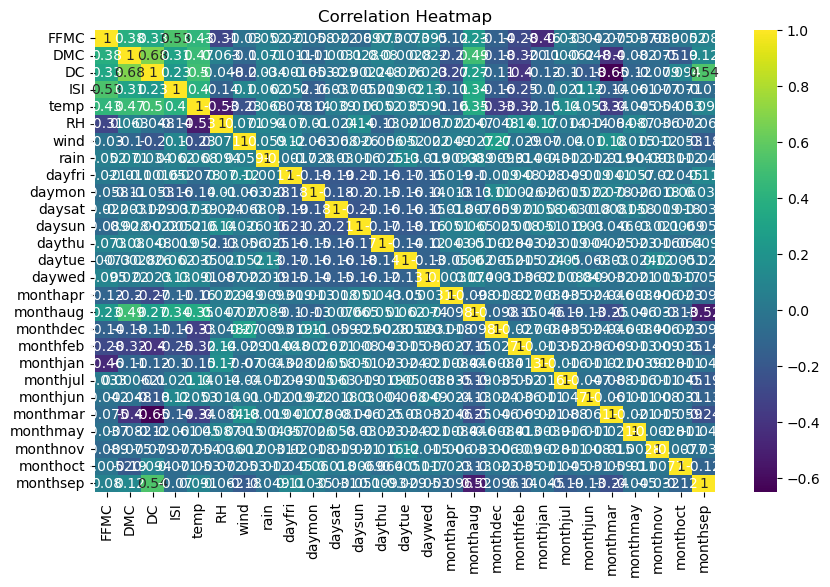

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6768 - loss: 0.6702 - val_accuracy: 0.7561 - val_loss: 0.6338
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7444 - loss: 0.5953 - val_accuracy: 0.7683 - val_loss: 0.6106
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7227 - loss: 0.5979 - val_accuracy: 0.7683 - val_loss: 0.5904
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7614 - loss: 0.5320 - val_accuracy: 0.7683 - val_loss: 0.5887
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7341 - loss: 0.5541 - val_accuracy: 0.7683 - val_loss: 0.5867
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7846 - loss: 0.4955 - val_accuracy: 0.7683 - val_loss: 0.5989
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7425 - loss: 0.5378 - val_accuracy: 0.7805 - val_loss: 0.5880
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7746 - loss: 0.5018 - val_accuracy: 0.7805 - val_lo

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Suppress warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully.")

# Loading the dataset
forest = pd.read_csv("G:/TOP-MENTOR/FILES/Sep 24th/Final Assignment/forestfires.csv")
print("Dataset loaded successfully.")
print(forest.head(10))

# Exploring the dataset
print(f"Dataset shape: {forest.shape}")
print(forest.info())

# Identifying categorical and numerical columns
cat_columns = forest.select_dtypes(include=['object']).columns.tolist()
num_columns = forest.select_dtypes(include=['number']).columns.tolist()
num_columns.remove('area')  # Exclude the target variable

print(f'Categorical columns: {cat_columns}')
print(f'Numerical columns: {num_columns}')

# Checking for null values and duplicates
print(f"Null values:\n{forest.isna().sum()}")
print(f"Duplicate rows: {forest.duplicated().sum()}")

# Dropping duplicate rows
forest.drop_duplicates(inplace=True)

# Statistical Analysis
print(forest.describe())
print(forest.describe(include=['object']))

# Data Visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(data=forest[num_columns])
plt.title("Box plots of Numerical Features")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=forest)
plt.title('Monthly Occurrences of Forest Fires')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='area', data=forest, hue='day')
plt.title('Relative Humidity (RH) vs. Burned Area')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Burned Area')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(forest[num_columns].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

# Data Transformation and Feature Engineering
forest.drop(columns=['month', 'day'], inplace=True)  # Dropping unnecessary columns

# Splitting the dataset into features and target variable
X = forest.drop('size_category', axis=1)
y = forest['size_category']

# Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# Normalizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification
])

# Compiling the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluating the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
